# Support Vector Machines

```
Table of Contents

1. Introduction

2. Mathematical Intuition
    - The cost function
    - Inner product of two vectors
    - SVM boundary decision
    - Kernel methods

3. Codes:
    - With Scikit-learn
    - From scratch
```

### 1. Introduction

Support Vector Machines (SVM) is one of the most popular machine learning algorithms. Before the deep learning method was popular in 2012, most researches preferred SVM to deep learning. SVM is a supervised-learning algorithm that kernelized data for classification and regression analysis. SVM constructs a multi-dimensional hyperplane or a set of multi-dimensional hyperplanes to separate different types of data.

Here, the mathematical intuition behind SVM will be explained. In order to describe the nonlinear problem, explainations to the kernel method will be provide. **In the end, simple codes are provided.**

### 2. Mathematical Intuition

### The cost function

In every machine learning algorithm, there exists an optimization scheme. The optimization objective is to minimize the cost function with respect to the weights. Here is an example of cost function:<br />
<br />
<center> $min_{w} [C \sum_{i=1}^m{y^{(i)} F_{1}(w^Tx^{(i)}) + (1-y^{(i)}) F_{0}(w^Tx^{(i)})} + \frac{1}{2} \sum_{j=1}^{n}w_j^{2} ] $ </center>
<br />
This cost function measures the performance of a binary classification sampling. Let's suppose a prediction to classify negative and positive ions. $y^{(i)}$ is the i-th sample of ions out of the total of m ions. If the i-th ion is negative, $y^{(i)}$ is 0 and vice versa. The C in the first term is the weight penalizing parameter. Large C represents smaller effect on the weights (i.e. the second term), whereas small C emphasize on the importance of the weights. The second term is the regularization term which composes of the sum all the weights square up to n weights. This is usually called l2 regularization due to the square. Here, the $F(w^Tx)$ is defined to be the Rectified Linear Unit (ReLU)* function. The subscripts 0 and 1 on the F function correspond to negative and positive ion, respectively.

The plots of the ReLU functions are shown below. The left-hand side graph is $F_{0}(w^Tx^{(i)})$, and the right-hand side graph is $F_{1}(w^Tx^{(i)})$. Thus, there are two conditions to be satisfied in minimization of the weights:
<br />
- If y = 1 (positive ion), then $w^Tx >> 0$
<br />
- If y = 0 (negative ion), then $w^Tx << 0$

*ReLU is the most popular activation function for artificial neural network (ANN).

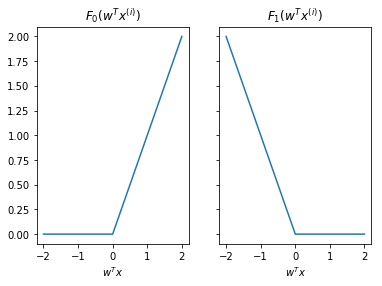

In [2]:
# Plotting ReLU function
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-2, 2.1, .1)
zero = np.zeros(len(z))
y1 = np.max([zero, z], axis=0)
y2 = np.max([zero, -z], axis=0)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(z, y1)
ax1.set_title('$F_{0}(w^Tx^{(i)})$')
ax1.set_xlabel('$w^Tx$')

ax2.plot(z, y2)
ax2.set_title('$F_{1}(w^Tx^{(i)})$')
ax2.set_xlabel('$w^Tx$')
plt.show()

The choice of C is usually of a large number (i.e. $10^5$) for the SVM to perform better. For example, SVM can detect outliers with larger choice of C. If C is large, the minimization process will force the sum in the first term of the cost function to be as close to zero. Thus, the first term is assumed to be zero for large C. Then, the second term is the only term remains.

Before moving on to minimizing the second term, let's revisit vector inner product because it is the fundamental workhorse of SVM.

### Inner product of two vectors

Let's review the vector inner product. For instance, there are vector a and b defined as:

a = (a1, a2) <br />
b = (b1, b2) <br />
a · b = (a1)(b1) + (a2)(b2) <br />

This is also equivalently true:

a · b = |a||b| cos(θ)

Now, let's suppose that p = |a| cos(θ). p is the length of projection of vector a to vector b. In the figure below, the length of the black vector (p) is equal to |a| cos(θ), i.e. the projection of red vector to the blue vector.

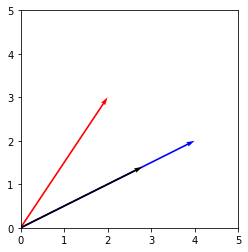

In [3]:
# A visualization for inner product
import numpy as np
import matplotlib.pyplot as plt

soa = np.array([[0, 0, 2, 3], [0, 0, 4, 2],[0, 0, 2.7996, 1.3998]])
X, Y, U, V = zip(*soa)
plt.figure()
ax = plt.gca()
ax.axis('scaled')
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color = ['r', 'b','k'])
ax.set_xlim([0, 5])
ax.set_ylim([0, 5])
plt.draw()
plt.show()

### SVM Decision Boundary

Instictively, the black line looks like a better choice for separating the red and blue datasets in comparison to the green line. Coincidentally, SVM also pick the black line to be the decision boundary.

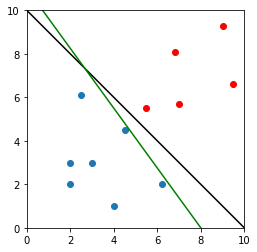

In [4]:
# Example of 

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10,10,1000)
y1 = -x + 10
y2 = -(11/8)*x + 11

# Plotting
plt.figure()
ax = plt.gca()
ax.axis('scaled')
ax.scatter([2,2,4,3,4.5,6.2,2.5],[2,3,1,3,4.5,2,6.1])
ax.scatter([7,9,9.5,6.8,5.5],[5.7,9.3,6.6,8.1,5.5], c = 'r')
ax.plot(x,y1, color = 'k')
ax.plot(x,y2, color = 'g')
ax.set_xlim([0, 10])
ax.set_ylim([0, 10])
plt.draw()
plt.show()

To explain SVM decision boundary, let's imagine that the vector a == w and b == x. w is a vector of weights, and x is a vector of features. For simplicity, let's consider 2 dimensions:

w = (w1, w2)<br />
x = (x1, x2)<br />

This means x has two features: x1 and x2. And, $w^Tx$ = |w||x|cos(θ) or $w^Tx$ = p·|w|. With large C, one can rewrite the two conditions given in the cost function as follow:
<br />
- If y = 1 (positive ion), then $p·|w| >> 0$
<br />
- If y = 0 (negative ion), then $p·|w| << 0$

It can be proved that the decision boundary is perpendicular to the weight vector (w). In the graph below, the green vector is the weight vector. The purple vector is a projection vector of the X point.

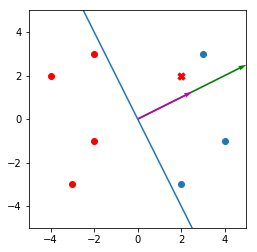

In [5]:
# SVM Decision Boundary in feature space with blue line as decision boundary.

import numpy as np
import matplotlib.pyplot as plt

# Decision boundary (blue line)
x = np.linspace(-10,10,1000)
y1 = -2*x

# the weight vector
soa = np.array([[0, 0, 5, 2.5], [0, 0, 2.5, 1.25]])
X, Y, U, V = zip(*soa)

# Plotting
plt.figure()
ax = plt.gca()
ax.axis('scaled')
ax.scatter([2,4,3],[-3,-1,3])
ax.scatter([-4,-3,-2,-2],[2,-3,-1,3], c = 'r')
ax.scatter(2,2,c = 'r', marker = 'X', s = 50)
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color = ['g', 'm']) # weight vector and projection vector of X
ax.plot(x,y1)
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
plt.draw()
plt.show()

However, this decision boundary will not be the optimal one because it doesn't satisfy the two equation. The optimal decision boundary will be the black line as describe below.

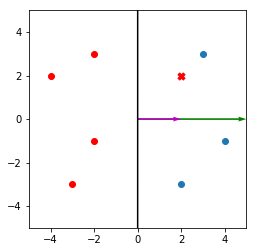

In [6]:
# SVM Decision Boundary in feature space with black line as the best decision boundary.

import numpy as np
import matplotlib.pyplot as plt

# Decision boundary (blue line)
x = np.linspace(-10,10,1000)
y1 = 10000*x

# the weight vector
soa = np.array([[0, 0, 5, 0], [0, 0, 2, 0]])
X, Y, U, V = zip(*soa)

# Plotting
plt.figure()
ax = plt.gca()
ax.axis('scaled')
ax.scatter([2,4,3],[-3,-1,3])
ax.scatter([-4,-3,-2,-2],[2,-3,-1,3], c = 'r')
ax.scatter(2,2,c = 'r', marker = 'X', s = 50)
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color = ['g', 'm']) # weight vector and projection vector of X
ax.plot(x,y1,color='k')
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
plt.draw()
plt.show()

### Kernel methods

#### Polynomial Kernel
For non-linear decision boundary, one can extend the polynomial of the features to a higher order than 1. For instance, the SVM is separating datasets with two features ($x_1 and x_2$):<br />
<br />
<center> $y = w_0 + w_1x_1+ w_2x_2 + w_3x_1x_2 + w_4x_1^2 + w_5x_2^2 + ... $ </center>
<br />
Now, let's suppose: 
<br />
<center> $y = w_0 + w_1f_1+ w_2f_2 + w_3f_3 + w_4f_4 + w_5f_5 + ... $ </center>
<br />
where $f_1 = x_1, f_2 = x_2, f_3 = x_1x_2, f_4 = x_1^2, f_5 = x_2^2, ...$. This is called kernelized. In this particular case, $f_i$ is a polynomial kernel. However, polynomial optimization can be very time consuming as the order increases.

#### Gaussian Kernel

Gaussian kernel is sometimes called similarity kernel. In scikit-learn, rbf is equivalent to gaussian kernel. Let's define the gaussian kernel:
<br />
<br />
<center> $f = similarity(x,l) = exp(-\frac{||x-l||^2}{2\gamma^2}) $ </center>
<br />
l is a landmark. A landmark is a point in feature space which defines as a similarity reference point relative to the data point. The numbers of feature are equal to the numbers of landmark.
<br />
<br />
If x ≈ l:
<br />
<br />
<center> $f = exp(-\frac{||x-l||^2}{2\gamma^2}) = 1$ </center>
<br />
If x is far from l:
<br />
<br />
<center> $f = exp(-\frac{||x-l||^2}{2\gamma^2}) = 0$ </center>
<br />

## 3. Codes

### With Scikit-learn

In [7]:
# This code is taken from:

import numpy as np
from sklearn.svm import SVC

# #############################################################################
# Generate sample data
x_ = [[9.123456, 3.123456],
      [9.123456, 5.123456],
      [5.123456, 5.123456],
      [8.123456, 6.654321],
      [4.654321, 4.123456],
      [2.123456, 4.123456],
      [9.123456, 7.123456],
      [4.123456, 4.654321],
      [8.654321, 2.123456],
      [2.123456, 2.123456],
      [3.123456, 3.123456],
      [8.654321, 4.123456],
      [7.123456, 6.123456],
      [4.123456, 7.123456],
      [6.923456, 4.623456],
      [8.123456, 5.123456],
      [3.123456, 4.123456]]
y_ = [+1, +1, -1, +1, -1, -1, +1, -1, +1, -1, -1, +1, +1, -1, -1, +1, -1]

# #############################################################################
svr_lin = SVC(kernel='linear', C=1.)
y_lin = svr_lin.fit(x_, y_)

/home/yanxon/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


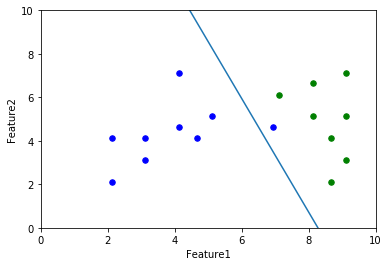

In [8]:
import matplotlib.pyplot as plt

def plot(b, w):
    x0 = []; y0= []; x1 = []; y1 = []
    for i in range(17):
        if y_[i] == -1:
            x0.append(x_[i][0])
            y0.append(x_[i][1])
        else:
            x1.append(x_[i][0])
            y1.append(x_[i][1])
    
    plot = plt.figure()
    plt.xlabel('Feature1')
    plt.ylabel('Feature2')
    ax = plot.add_subplot(1,1,1)
    ax.scatter(x0, y0, marker='o', s=30, c='blue')
    ax.scatter(x1, y1, marker='o', s=30, c='green')
    
    _x = np.arange(0.0, 10.0, 0.1)
    _y = (-w[0] * _x - b) / w[1]
    
    ax.plot(_x, _y)
    ax.axis([0, 10, 0, 10])
    plt.show()

plot(svr_lin.intercept_, svr_lin.coef_[0])

### From Scratch

In [24]:
import numpy as np

class SVM:
    def __init__(self, x, y, epsilon=0.001, C=1.0):
        self._x = x
        self._y = y
        self.no_of_samples = np.shape(x)[0]
        self.epsilon = epsilon
        self.C = C
        
        # Parameters to be optimized
        self._alpha = np.mat(np.zeros((self.no_of_samples, 1)))
        self._b = np.mat([[0]])
        
    def fit(self, iteration=50):
        
        i = 0
        while (i < iteration):
            if (self.SMO() == 0):
                i += 1
            else:
                i = 0
                
        self._w = self.calculate_w(self._alpha, self._x, self._y)
        
    def SMO(self,):
        """Perform SMO algorithm here."""
        no_of_opt_pair_alphas = 0
        for i in range(self.no_of_samples):
            Ei = np.multiply(self._y, self._alpha).T * self._x * self._x[i].T + self._b - self._y[i]
            if self.check_KKT(self._alpha[i], Ei):
                j = self.generate_alphaj_index(i, self.no_of_samples)
                Ej = np.multiply(self._y, self._alpha).T * self._x * self._x[j].T + self._b - self._y[j]
                alphaIold = self._alpha[i].copy()
                alphaJold = self._alpha[j].copy()
                bounds = self.get_bounds(self._alpha[i], self._alpha[j], self._y[i], self._y[j])
                eta = self.calculate_eta(self._x[i], self._x[j])
                
                # update alphas and b
                if bounds[0] != bounds[1] and eta < 0:
                    self._alpha[j] -= self._y[j] * (Ei - Ej) / eta # Update alpha j
                    self.clip_alphaj(j, bounds)
                    
                    # Check if the alpha j satisfy some tolerance
                    if (abs(self._alpha[j] - alphaJold) >= 0.00001):
                        self._alpha[i] += self._y[j] * self._y[i] * (alphaJold - self._alpha[j])
                        
                        # Update b
                        b1 = self._b - Ei - self._y[i] * (self._alpha[i] - alphaIold)\
                                          * self._x[i] * self._x[i].T\
                                          - self._y[j] * (self._alpha[j] - alphaJold)\
                                          * self._x[i] * self._x[j].T
                        b2 = self._b - Ej - self._y[i] * (self._alpha[i] - alphaIold)\
                                          * self._x[i] * self._x[j].T\
                                          - self._y[j] * (self._alpha[j] - alphaJold)\
                                          * self._x[j] * self._x[j].T
                        
                        if (0 < self._alpha[i]) and (self.C > self._alpha[i]):
                            self._b = b1
                        elif (0 < self._alpha[j]) and (self.C > self._alpha[j]):
                            self._b = b2
                        else:
                            self._b = (b1 + b2) / 2.
                            
                        no_of_opt_pair_alphas += 1
                        
                    else:
                        self._alpha[j] = alphaJold
            
        return no_of_opt_pair_alphas
        
    def generate_alphaj_index(self, alphaIindex, no_of_samples):
        alphaJindex = alphaIindex
        while (alphaIindex == alphaJindex):
            alphaJindex = int(np.random.uniform(0, no_of_samples))
        return alphaJindex
    
    def check_KKT(self, alpha, error):
        """Check if the alpha violates the KKT conditions."""
        return ((alpha > 0 and np.abs(error) < self.epsilon) or (alpha < self.C and np.abs(error) > self.epsilon))
    
    def get_bounds(self, alphai, alphaj, yi, yj):
        """
        y1 != y2:
        - L = max(0, alpha2 - alpha1)
        - H = min(C, C + alpha2 - alpha1)
        
        y1 = y2:
        - L = max(0, alpha2 + alpha1 - C)
        - H = min(C, alpha2 + alpha1)
        """
        bounds = []
        if (yi == yj):
            bounds.insert(0, max(0, alphaj + alphai - self.C))
            bounds.insert(1, min(self.C, alphaj + alphai))
        else:
            bounds.insert(0, max(0, alphaj - alphai))
            bounds.insert(1, min(self.C, alphaj - alphai + self.C))
            
        return bounds
            
    def calculate_eta(self, xi, xj):
        return (2.0 * xi * xj.T - xi * xi.T - xj * xj.T)
    
    def clip_alphaj(self, j, bounds):
        """
                        H       if alpha2 >= H
        alpha2clipped = alpha2  if L < alpha2 < H
                        L       if alpha2 <= L
        """
        self._alpha[j] = min(self._alpha[j], bounds[1])
        self._alpha[j] = max(self._alpha[j], bounds[0])
        
    def calculate_w(self, alpha, x, y):
        w = np.zeros((np.shape(x)[1], 1))
        for i in range(self.no_of_samples):
            w += np.multiply(y[i] * alpha [i], x[i].T)
        return w
    
    def classify(self, w):
        classification = "No!"
        if (np.sign((x @ self._w + self._b).item(0, 0)) == 1):
            classification = "Yes!"
        return classification
    
    def get_alpha(self):
        return self._alpha
    
    def get_b(self):
        return self._b
    
    def get_w(self):
        return self._w

In [25]:
# Train SVM

x = np.mat(x_)
y = np.mat(y_).transpose()

# Run SVM
iteration = 50
C = 8.
svm = SVM(x, y, C=C)
svm.fit(iteration)

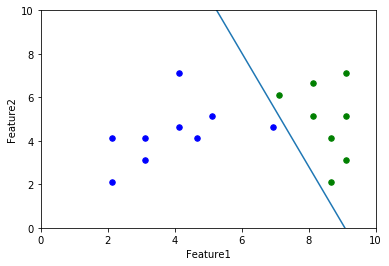

In [26]:
plot(svm.get_b().item(0, 0), svm.get_w())